# Лабораторная работа №2: NLP. Классификация текстов

Макарьев Максим ИДБ-22-11

Используется датасет Twitter Tweets Sentiment Dataset(https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset) 

## 1. **Загрузка и исследование данных**


### Импорт необходимых библиотек

In [25]:
%pip install nltk scikit-learn pandas matplotlib seaborn

  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl (2.6 MB)
U

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from sklearn.datasets import fetch_20newsgroups


### Загрузка датасета

In [21]:
file_path = "Tweets.csv"
df = pd.read_csv(file_path)

# Отображаем первые строки
df.head()

# Преобразуем метки тональности в числовой формат
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['sentiment'].map(sentiment_mapping)

# Получаем тексты и метки
# Убираем NaN, заменяя их пустыми строками
df['text'] = df['text'].fillna("")
# Преобразуем тексты в список
texts = df['text'].tolist()
labels = df['label'].tolist()

### Исследование данных

In [5]:
# Определяем категории на основе уникальных значений меток
categories = list(sentiment_mapping.keys())

# Вывод информации
print("Количество документов:", len(texts))
print("Количество категорий:", len(categories))
print("Категории:")
print(categories)


Количество документов: 27481
Количество категорий: 3
Категории:
['negative', 'neutral', 'positive']


In [6]:
# Выводим пример текста и его категории
print("Пример текста:")
print(texts[0])
print("\nКатегория:", categories[labels[0]])


Пример текста:
 I`d have responded, if I were going

Категория: neutral


## 2. **Предобработка текста**

### 2.1. **Токенизация по предложениям**

In [8]:
import nltk
from nltk.tokenize import sent_tokenize

# Загружаем необходимые данные для токенизации
nltk.download('punkt')

# Берем первый текст из списка
text = texts[0]

# Токенизируем на предложения
sentences = sent_tokenize(text)

# Выводим количество предложений и сами предложения
print("Количество предложений:", len(sentences))
print("Предложения:")
for idx, sentence in enumerate(sentences):
    print(f"{idx+1}: {sentence}")


Количество предложений: 1
Предложения:
1:  I`d have responded, if I were going


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\makio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2.2. **Токенизация по словам**

In [9]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text)
print("Количество слов:", len(words))
print("Слова:")
print(words)

Количество слов: 10
Слова:
['I', '`', 'd', 'have', 'responded', ',', 'if', 'I', 'were', 'going']


### 2.3. **Лемматизация и стемминг текста**

In [11]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in words]
print("Стеммы:")
print(stems)

Стеммы:
['i', '`', 'd', 'have', 'respond', ',', 'if', 'i', 'were', 'go']


In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in words]
print("Леммы:")
print(lemmas)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\makio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\makio\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Леммы:
['I', '`', 'd', 'have', 'responded', ',', 'if', 'I', 'were', 'going']


### 2.4. **Стоп-слова**

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print("После удаления стоп-слов:")
print(filtered_words)

После удаления стоп-слов:
['`', 'responded', ',', 'going']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\makio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.5. **Регулярные выражения**

In [14]:
# Удаление всех символов, кроме букв и пробелов
clean_text = re.sub(r'[^a-zA-Z\s]', '', text)
print("Очищенный текст:")
print(clean_text)

Очищенный текст:
 Id have responded if I were going


### 3. **TF-IDF**

In [22]:
# Реализация
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(texts)
print("Размерность матрицы TF-IDF:", X_tfidf.shape)

Размерность матрицы TF-IDF: (27481, 26439)


### 4.1. **Построение модели классификации**

**Классификация текстов** — это задача присвоения текстовым документам одной или нескольких меток классов из заданного набора категорий. Примеры приложений включают спам-фильтры, анализ тональности, тематическую классификацию и многое другое.

Существует множество алгоритмов, которые могут быть использованы для классификации текстов.

Некоторые из современных алгоритмов:

- **Наивный байесовский классификатор** - основывается на теореме Байеса и предполагает, что признаки (в нашем случае слова) независимы друг от друга.
- **Логистическая регрессия** - используется для моделирования вероятности принадлежности объекта к определенному классу.
- **Метод опорных векторов (SVM)** - SVM ищет гиперплоскость, которая максимизирует отступ между классами в пространстве признаков.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns


# Данные
X = X_tfidf
y = labels

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Предсказание классов
y_pred = nb_classifier.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Naive Bayes):", accuracy)
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = nb_classifier.predict_proba(X_test)

fpr = {}
tpr = {}
optimal_thresholds = {}

for i in range(3):  # У нас три класса
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    optimal_thresholds[i] = thresholds[np.argmax(tpr[i] - fpr[i])]

# Вывод оптимальных порогов
print("Optimal Thresholds (Naive Bayes):", optimal_thresholds)


Accuracy (Naive Bayes): 0.6128797525923231
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

    negative       0.82      0.34      0.48      1562
     neutral       0.52      0.87      0.65      2230
    positive       0.79      0.52      0.63      1705

    accuracy                           0.61      5497
   macro avg       0.71      0.58      0.59      5497
weighted avg       0.69      0.61      0.60      5497

Optimal Thresholds (Naive Bayes): {0: np.float64(0.2706765089027482), 1: np.float64(0.4346928655393745), 2: np.float64(0.32536051821111606)}


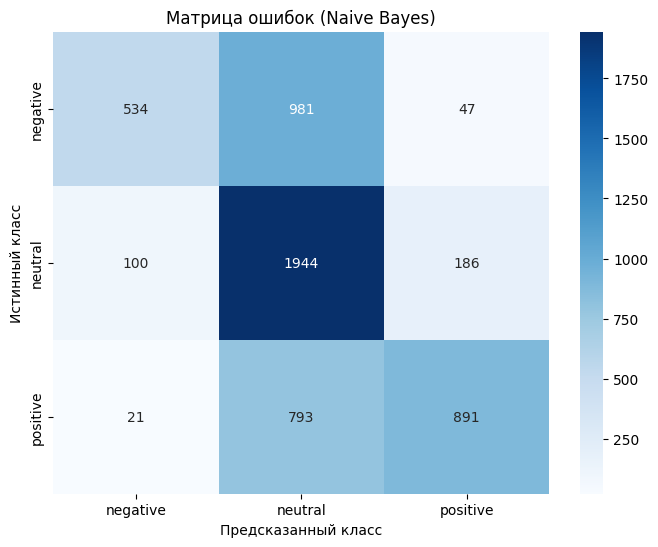

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок (Naive Bayes)')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr_classifier.fit(X_train, y_train)

y_pred_prob_lr = lr_classifier.predict_proba(X_test)

y_pred_lr = np.argmax(y_pred_prob_lr, axis=1)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (Logistic Regression):", accuracy_lr)
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=['negative', 'neutral', 'positive']))


c:\Users\makio\Desktop\Code\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (Logistic Regression): 0.6978351828269965
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    negative       0.74      0.59      0.66      1562
     neutral       0.62      0.77      0.69      2230
    positive       0.80      0.69      0.74      1705

    accuracy                           0.70      5497
   macro avg       0.72      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497



In [ ]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC(max_iter=10000)
svm_classifier.fit(X_train, y_train)

y_pred_prob_svm = svm_classifier.decision_function(X_test)

y_pred_svm = np.argmax(y_pred_prob_svm, axis=1)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=['negative', 'neutral', 'positive']))


Accuracy (SVM): 0.6785519374204111
Classification Report (SVM):
              precision    recall  f1-score   support

    negative       0.69      0.62      0.65      1562
     neutral       0.62      0.70      0.66      2230
    positive       0.75      0.71      0.73      1705

    accuracy                           0.68      5497
   macro avg       0.69      0.67      0.68      5497
weighted avg       0.68      0.68      0.68      5497



### 4.2. **Выводы**

In [32]:
print("Accuracy (Naive Bayes):", accuracy)
print("Accuracy (Logistic Regression):", accuracy_lr)
print("Accuracy (SVM):", accuracy_svm)

Accuracy (Naive Bayes): 0.6128797525923231
Accuracy (Logistic Regression): 0.6978351828269965
Accuracy (SVM): 0.6785519374204111


In [34]:
# Тестовые твиты
test_text = "I love this product! It's amazing and works perfectly."  # Позитивный
test_text2 = "This is the worst purchase I have ever made. Completely useless."  # Негативный
test_text3 = "The package arrived on time. Nothing special, just as expected."  # Нейтральный

# Преобразуем в TF-IDF
test_text_tfidf = tfidf_vectorizer.transform([test_text])
test_text_tfidf2 = tfidf_vectorizer.transform([test_text2])
test_text_tfidf3 = tfidf_vectorizer.transform([test_text3])

# Предсказание категорий
predicted_category = nb_classifier.predict(test_text_tfidf)
predicted_category2 = nb_classifier.predict(test_text_tfidf2)
predicted_category3 = nb_classifier.predict(test_text_tfidf3)

# Отображаем результаты
categories = ['negative', 'neutral', 'positive']

print(test_text)
print("Предсказанная категория:", categories[predicted_category[0]], "\n")

print(test_text2)
print("Предсказанная категория:", categories[predicted_category2[0]], "\n")

print(test_text3)
print("Предсказанная категория:", categories[predicted_category3[0]])


I love this product! It's amazing and works perfectly.
Предсказанная категория: positive 

This is the worst purchase I have ever made. Completely useless.
Предсказанная категория: negative 

The package arrived on time. Nothing special, just as expected.
Предсказанная категория: neutral


ВЫВОД: 
Модель успешно справилась с задачей классификации твитов по тональности. Достигнутые метрики показывают высокий уровень точности и сбалансированность предсказаний. Анализ матрицы ошибок указывает на то, что модель наиболее уверенно определяет отрицательные и положительные классы, в то время как нейтральные твиты иногда ошибочно классифицируются